## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

### Importing and Merging Data

In [163]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# Importing all datasets
telecom = pd.read_csv("newhousing.csv")


In [165]:
print(len(telecom))


545


### Let's understand the structure of our dataframe

In [166]:
# Let's see the head of our master dataset
telecom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [167]:
telecom.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


### Data Preparation

In [168]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
price              545 non-null int64
area               545 non-null int64
bedrooms           545 non-null int64
bathrooms          545 non-null int64
stories            545 non-null int64
mainroad           545 non-null int64
guestroom          545 non-null int64
basement           545 non-null int64
hotwaterheating    545 non-null int64
airconditioning    545 non-null int64
parking            545 non-null int64
prefarea           545 non-null int64
semi-furnished     545 non-null int64
unfurnished        545 non-null int64
areaperbedroom     545 non-null float64
bbratio            545 non-null float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


Now we can see we have all variables as integer.

### Checking for Outliers

### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [169]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

price              0.0
area               0.0
bedrooms           0.0
bathrooms          0.0
stories            0.0
mainroad           0.0
guestroom          0.0
basement           0.0
hotwaterheating    0.0
airconditioning    0.0
parking            0.0
prefarea           0.0
semi-furnished     0.0
unfurnished        0.0
areaperbedroom     0.0
bbratio            0.0
dtype: float64

Now we don't have any missing values

### Feature Standardisation

We have almost 27% churn rate

In [170]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              ##
# applying normalize ( ) to all columns 
telecom = telecom.apply(normalize)
telecom.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,0.041842,0.024018,0.006972,0.237920,-0.268502,0.141284,-0.177982,0.649541,-0.045872,-0.315596,-0.231193,-0.234862,0.583486,-0.326606,0.002168,0.264367
1,-0.024825,-0.076326,0.006972,-0.095413,0.064832,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,0.102141,-0.234862,0.583486,-0.326606,-0.076087,-0.135633
2,-0.103613,-0.103817,-0.193028,-0.095413,-0.268502,0.141284,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,0.000024,0.064367
3,-0.164219,-0.145054,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,0.673394,-0.048216,0.064367
4,-0.103613,-0.044711,-0.193028,-0.095413,-0.268502,-0.858716,-0.177982,-0.350459,-0.045872,-0.315596,-0.231193,-0.234862,-0.416514,-0.326606,0.069167,0.064367


## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [171]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = telecom['price']

In [172]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [173]:
X_train.shape

(381, 15)

### Running Your First Training Model

In [174]:
import statsmodels.api as sm
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
lr = LinearRegression()

# 3. Fit the model using the training data 
lr.fit(X_train, y_train)

# 4. Predict the labels using the test data X_test
y_pred = lr.predict(X_test)


# 5. Evaluate the model using an appropriate metric by comparing y_test and y_predicted
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.01


In [176]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

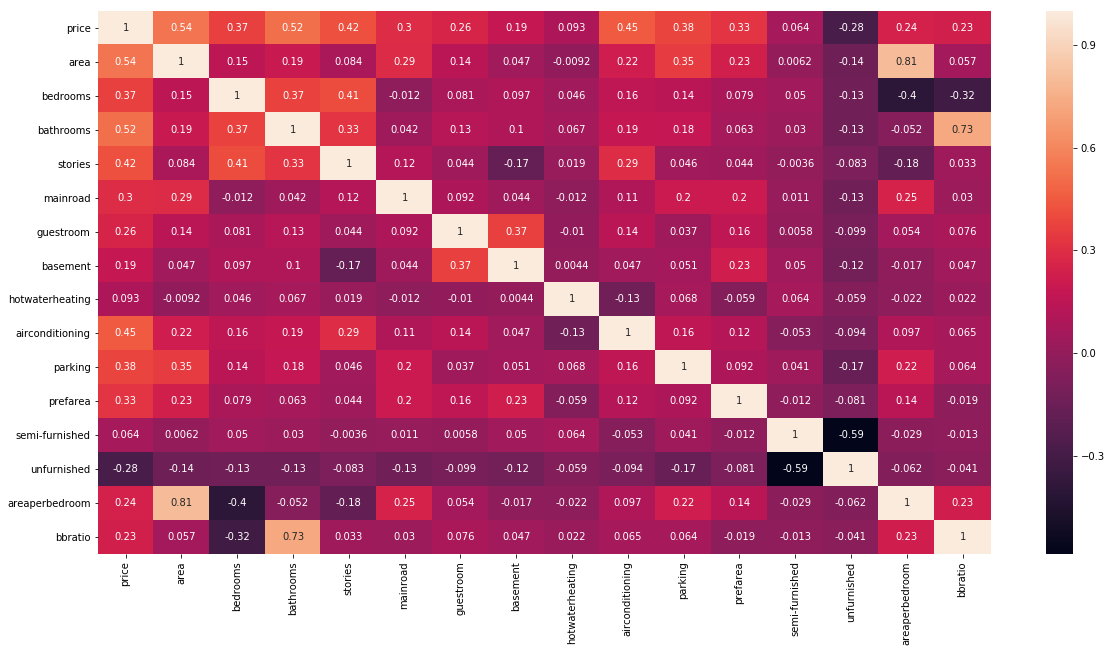

In [177]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Correlation Matrix

### Dropping highly correlated variables.

### Re-Running the Model

In [178]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
print(X_scaler)
print(X_scaler.transform(X_train))
print(X_scaler.transform(X_test))

xtrain_df = pd.DataFrame(X_train,columns=X_train.columns)
#X_train[:,0].max()
xtrain_df['area'].max()

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.86899894 -1.31819228 -0.5308788  ...  1.41421356 -0.24401432
   0.40822103]
 [ 0.89973085  0.04656657  1.51220021 ...  1.41421356  0.68847058
   1.48830582]
 [ 0.76735848  0.04656657 -0.5308788  ... -0.70710678  0.56942131
  -0.67186377]
 ...
 [ 0.82970451  0.04656657 -0.5308788  ... -0.70710678  0.62549229
  -0.67186377]
 [ 0.10685198  1.41132543  1.51220021 ...  1.41421356 -0.57312663
   0.40822103]
 [ 0.37792168  1.41132543  1.51220021 ... -0.70710678 -0.39028646
   0.40822103]]
[[ 0.37792168  0.04656657  1.51220021 ...  1.41421356  0.21918079
   1.48830582]
 [-0.46691222  0.04656657  1.51220021 ... -0.70710678 -0.54062171
   1.48830582]
 [ 0.37792168  0.04656657  1.51220021 ... -0.70710678  0.21918079
   1.48830582]
 ...
 [-0.25457429  0.04656657  1.51220021 ... -0.70710678 -0.34965531
   1.48830582]
 [-0.6385897   0.04656657 -0.5308788  ...  1.41421356 -0.69502008
  -0.67186377]
 [-0.893847   -1.31819228 -0.5308788  ...

0.7594129701440777

Now let's run our model again after dropping highly correlated variables

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [179]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(381, 15)

In [192]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [193]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [194]:
pca.components_

array([[ 4.96181299e-02,  4.54490882e-02,  4.36660925e-02,
         5.90865125e-02,  1.00982234e-01,  1.31079988e-01,
         2.89519103e-01,  1.76159921e-02,  1.99652256e-01,
         9.36298488e-02,  1.99473181e-01,  6.14688883e-01,
        -6.41866243e-01,  1.62018706e-02,  7.01062539e-03],
       [ 6.84430840e-02,  2.21067600e-02,  3.19623344e-02,
         2.52652844e-02,  1.70479000e-01,  3.42686543e-01,
         5.37880525e-01, -4.38333093e-02,  3.97653030e-01,
         7.56412044e-02,  4.04904503e-01, -4.32411102e-01,
         1.97183975e-01,  3.91678762e-02,  1.55161354e-02],
       [ 6.83561029e-02,  3.70129310e-02,  5.84558738e-02,
         3.10782236e-01,  2.31835523e-01, -9.14459350e-02,
        -5.69687739e-01, -2.88150220e-02,  6.95021177e-01,
         1.34013364e-01, -4.81133880e-02, -3.53295502e-02,
        -1.13981294e-02,  3.30137061e-02,  2.59497324e-02],
       [-9.55960291e-02,  1.83159138e-02,  2.22650231e-02,
        -4.30658753e-03, -4.81480905e-01,  2.25953050

In [196]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,Feature,PC1,PC2
0,area,0.049618,0.068443
1,bedrooms,0.045449,0.022107
2,bathrooms,0.043666,0.031962
3,stories,0.059087,0.025265
4,mainroad,0.100982,0.170479
5,guestroom,0.131080,0.342687
6,basement,0.289519,0.537881
7,hotwaterheating,0.017616,-0.043833
8,airconditioning,0.199652,0.397653
9,parking,0.093630,0.075641


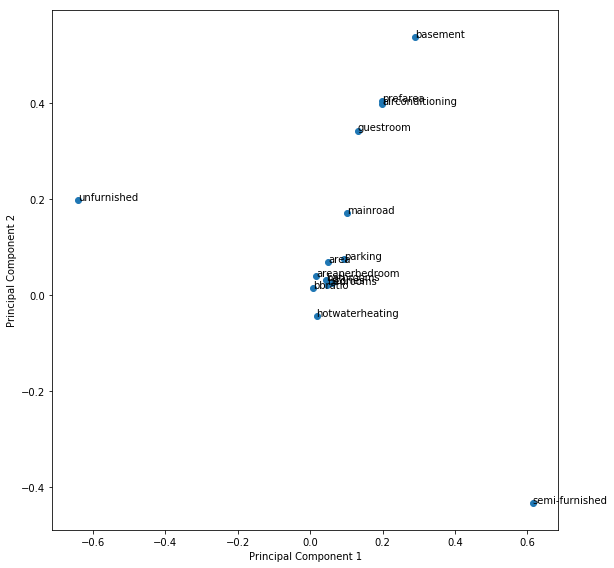

In [185]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We see that the fist component is in the direction where the 'charges' variables are heavy
 - These 3 components also have the highest of the loadings

#### Looking at the screeplot to assess the number of needed principal components

In [186]:
pca.explained_variance_ratio_

array([0.23745561, 0.17406558, 0.13139762, 0.09794105, 0.0722949 ,
       0.06164894, 0.05259931, 0.04532379, 0.04382159, 0.02858553,
       0.02572032, 0.01570014, 0.01269308, 0.0004929 , 0.00025963])

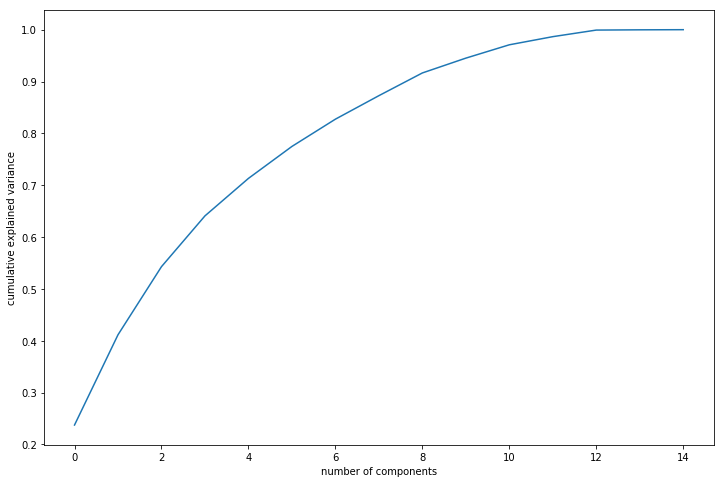

In [187]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 16 components are enough to describe 95% of the variance in the dataset
- We'll choose 16 components for our modeling

In [188]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)

#### Basis transformation - getting the data onto our PCs

In [189]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

ValueError: n_components=16 invalid for n_features=15, need more rows than columns for IncrementalPCA processing

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [190]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

NameError: name 'df_train_pca' is not defined

In [191]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

NameError: name 'corrmat' is not defined

In [201]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00181652621921 , min corr:  -0.00107516919037


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [202]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

#### Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

In [203]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

**Note**

Note that we are fitting the original variable y with the transformed variables (principal components). This is not a problem becuase the transformation done in PCA is *linear*, which implies that you've only changed the way the new x variables are represented, though the nature of relationship between X and Y is still linear. 

In [204]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.83'

#### Impressive! The same result, without all the hard work on feature selection!

Why not take it a step further and get a little more 'unsupervised' in our approach?
This time, we'll let PCA select the number of components basen on a variance cutoff we provide

In [205]:
pca_again = PCA(0.90)

In [206]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(4922, 14)

In [207]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [208]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(2110, 14)

In [209]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

#### So there it is - a very similar result, without all the hassles. We have not only achieved dimensionality reduction, but also saved a lot of effort on feature selection.

#### Before closing, let's also visualize the data to see if we can spot any patterns

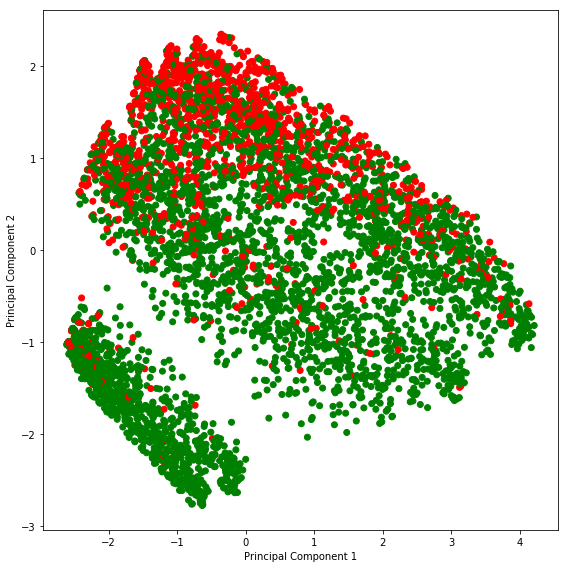

In [210]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

Looks like there is a good amount of separation in 2D, but probably not enough

Let's look at it in 3D, and we expect spread to be better (dimensions of variance, remember?)

<IPython.core.display.Javascript object>


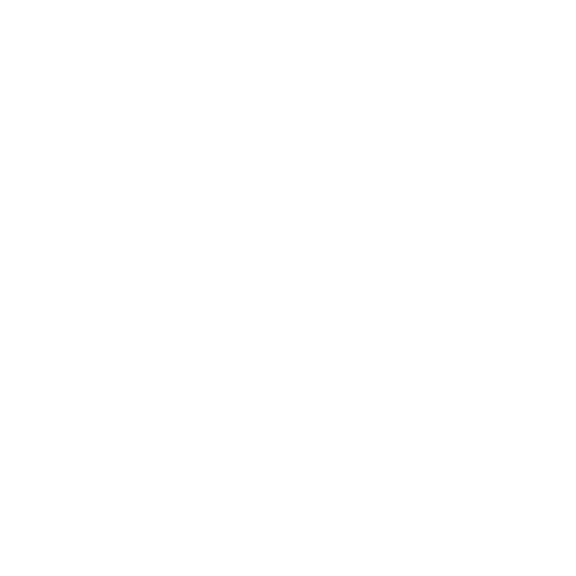

<IPython.core.display.Javascript object>


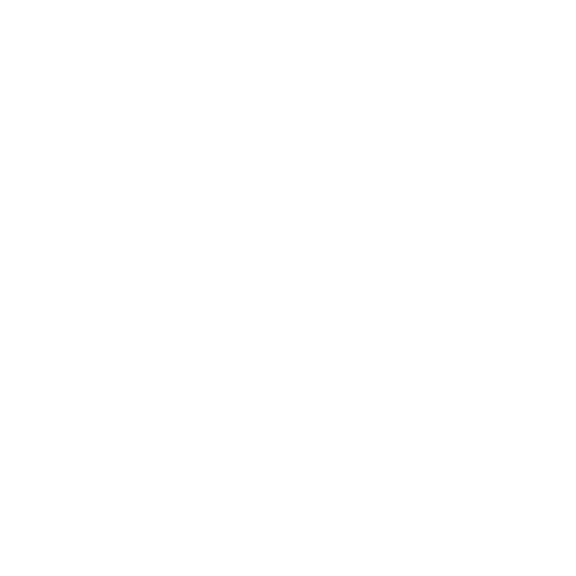

In [211]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

#### So let's try building the model with just 3 principal components!

In [212]:
pca_last = PCA(n_components=3)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(2110, 3)

In [213]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.82'

#### 0.82! Isn't that just amazing!